In [1]:
# %matplotlib inline
# %matplotlib widget
%reload_ext autoreload
%autoreload 2

from utils import *
from fuzzmeasure import *
from plotting import *
# from plotting_bokeh import *

# output_notebook()

In [ ]:
model_file  = 'marimba'
models_path = '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/models/json/'
model = json2model(models_path, model_file)

p = plotModel(model)
p.legend.location = "top_left"
p.legend.click_policy="hide"
l = layout([p])#, sizing_mode='stretch_width')
show(l)

In [26]:
session = loadSession('2019-10-11_142002_session')
session['state']

{'belaConnected': False,
 'setupPath': '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142002',
 'iterationPaths': ['/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142002',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142007',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142130',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142237',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142254',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142537',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/analysis/data/irs/2019-10-11/2019-10-11_142630',
  '/Users/jarm/Documents/git/svelte/projects/bela-sapper/src/anal

In [2]:
session_data = loadSessionAnalysisMetadata('2019-10-11_142002_session')
session_data[0]

Info                                               Data
1                 argv 1                                         2019-10-11
2                 argv 2                                  2019-10-11_142002
3                 argv 3                                         1s_0.0-20k
4                 argv 4  /Users/jarm/Documents/git/svelte/projects/bela...
5        starting script                                         1570800004
6               stimulus  Macintosh HD:Users:jarm:Documents:git:svelte:p...
7              recording  Macintosh HD:Users:jarm:Documents:git:svelte:p...
8             scriptFile                 2019-07-09_FuzzMeasure.applescript
9                   path  /Users/jarm/Documents/git/svelte/projects/bela...
10                  file                                  2019-10-11_142002
11       making document                                                0.0
12             measuring                                                0.0
13         making graphs                                                0.0
14  exporting graph data                                                0.0
15       saving document                                                0.0
16      closing document                                                1.0
17         ending script                                                1.0

In [21]:
num = 9

data = analysisFreqsMagsDf(getAnalysisFreqs(session_data[num]))

# data['Magnitude (dB)'] = data['Magnitude (dB)'] - data['Magnitude (dB)']
# data

fig, axis1 = plt.subplots(figsize=(8,6))

axis1.plot(data, color='black')
axis1.axis('off')
axis1.set_xscale ('log')
axis1.set_xticks ([10, 100, 1000, 10000])
axis1.get_figure().savefig('/Users/jarm/Desktop/'+datetime_str()+session['state']['iterationPaths'][num]+'_test'+'.pdf')

IndexError: list index out of range

In [47]:
def plotAll(diff=False, save=True):
    for index, iter in enumerate(session['state']['iterationPaths']):
        data = analysisFreqsMagsDf(getAnalysisFreqs(session_data[index]))
        ylim = (-120,0)
        file = ''
        if diff == True:
            ref = analysisFreqsMagsDf(getAnalysisFreqs(session_data[1])) 
            data['Magnitude (dB)'] = ref['Magnitude (dB)'] - data['Magnitude (dB)']
            ylim = (-60, 60)
            file = 'diff'
        fig, axis1 = plt.subplots(figsize=(8,6))
        axis1.plot(data, color='black')
        axis1.axis('off')
        axis1.set_xscale ('log')
        axis1.set_ylim (ylim)
        axis1.set_xticks ([10, 100, 1000, 10000])
        if save == True:
            filename = datetime_str()+'_'+datetimeFolderFromPath(session['state']['iterationPaths'][index])
            axis1.get_figure().savefig('/Users/jarm/Desktop/'+filename+'_'+file+'.pdf')

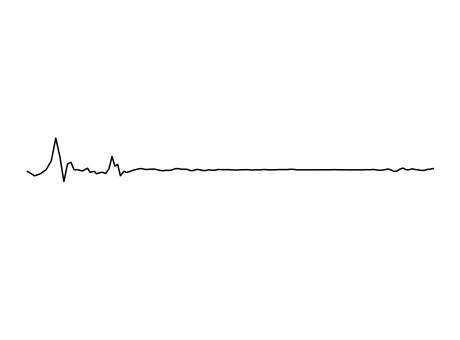

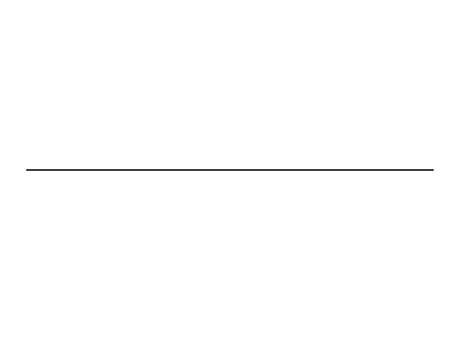

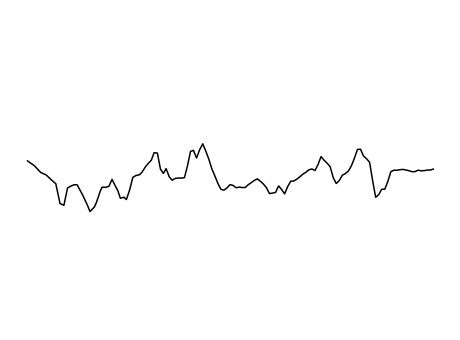

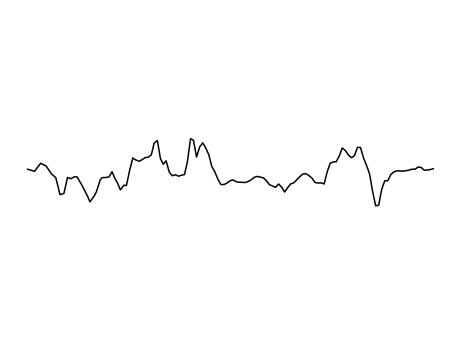

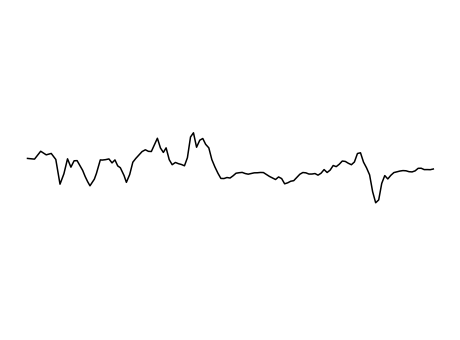

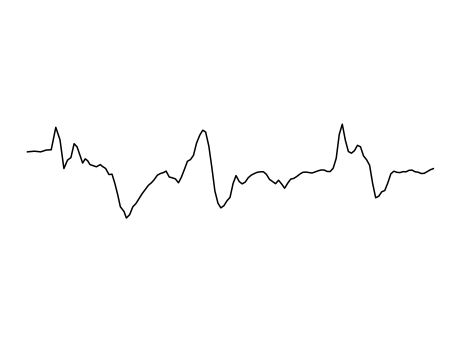

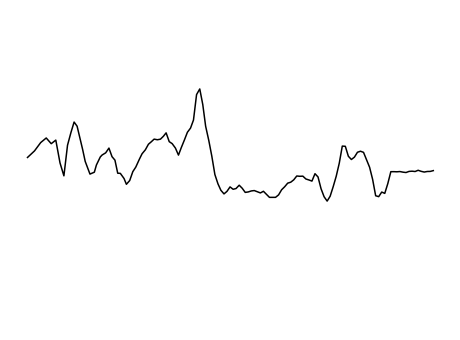

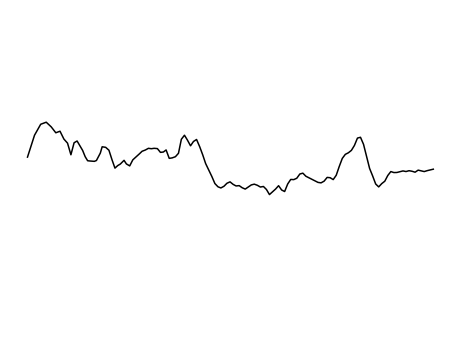

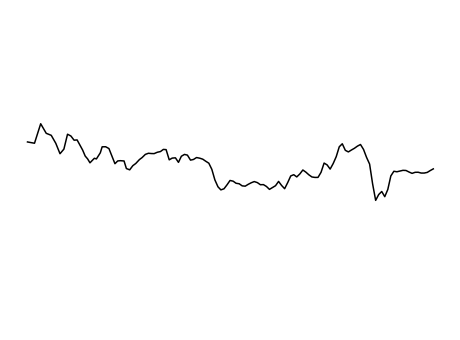

In [49]:
plotAll(True)